# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode():
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(
            '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
        )
    except:
        df = pd.read_csv('./data/fraud_detection_dataset.csv', nrows=10000, verbose=False)
    
    return df


In [2]:
df = ColabOuCode()

In [3]:
df.shape

(6362620, 11)

In [4]:
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', 11)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)

## Tratamento

In [7]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for v in varMonet: df[v][df[v] > 0] = np.log(df[v][df[v] > 0])

df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.194174,C1231006815,12.044353,11.984780,M1979787155,0.000000,0.0,0,0
1,1,PAYMENT,7.530630,C1666544295,9.964065,9.872240,M2044282225,0.000000,0.0,0,0
2,1,TRANSFER,5.198497,C1305486145,5.198497,0.000000,C553264065,0.000000,0.0,1,0
3,1,CASH_OUT,5.198497,C840083671,5.198497,0.000000,C38997010,9.960907,0.0,1,0
4,1,PAYMENT,9.364617,C2048537720,10.634749,10.305141,M1230701703,0.000000,0.0,0,0


In [8]:
df.describe(percentiles=(0.9,0.95,0.99))

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.084064e+01,7.414119e+00,5.366048e+00,7.722404e+00,8.330596e+00,1.290820e-03,2.514687e-06
std,1.423320e+02,1.815323e+00,5.670036e+00,6.330029e+00,6.747646e+00,6.675098e+00,3.590480e-02,1.585775e-03
min,1.000000e+00,-4.605170e+00,-2.995732e+00,-4.605170e+00,-4.605170e+00,-4.605170e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.122353e+01,9.561560e+00,0.000000e+00,1.179589e+01,1.227682e+01,0.000000e+00,0.000000e+00
90%,3.990000e+02,1.280881e+01,1.441572e+01,1.449372e+01,1.488513e+01,1.497706e+01,0.000000e+00,0.000000e+00
95%,4.900000e+02,1.315895e+01,1.557745e+01,1.560397e+01,1.545397e+01,1.552311e+01,0.000000e+00,0.000000e+00
99%,6.810000e+02,1.429545e+01,1.658980e+01,1.659905e+01,1.633093e+01,1.639101e+01,0.000000e+00,0.000000e+00
max,7.430000e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


In [9]:
# convertendo nameOrig e nameDest para int.

df['nameOrig'] = df['nameOrig'].str[1:]
df['nameDest'] = df['nameDest'].str[1:]

df[['nameOrig','nameDest']] = df[['nameOrig','nameDest']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 534.0+ MB


In [10]:
df = pd.get_dummies(df,
                    columns=['type'],
                    drop_first=False
)

colsReorg = [
    'step','type_CASH_IN','type_CASH_OUT','type_DEBIT',
    'type_PAYMENT','type_TRANSFER','amount','nameOrig',
    'oldbalanceOrig','newbalanceOrig','nameDest',
    'oldbalanceDest','newbalanceDest','isFraud',
    'isFlaggedFraud'
]

# Reorganizando para facilitar a vida
df = df[colsReorg]

pd.set_option('display.max_columns', 20)
df.head()


,step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,0,0,1,0,9.194174,1231006815,12.044353,11.984780,1979787155,0.000000,0.0,0,0
1,1,0,0,0,1,0,7.530630,1666544295,9.964065,9.872240,2044282225,0.000000,0.0,0,0
2,1,0,0,0,0,1,5.198497,1305486145,5.198497,0.000000,553264065,0.000000,0.0,1,0
3,1,0,1,0,0,0,5.198497,840083671,5.198497,0.000000,38997010,9.960907,0.0,1,0
4,1,0,0,0,1,0,9.364617,2048537720,10.634749,10.305141,1230701703,0.000000,0.0,0,0


## EAD

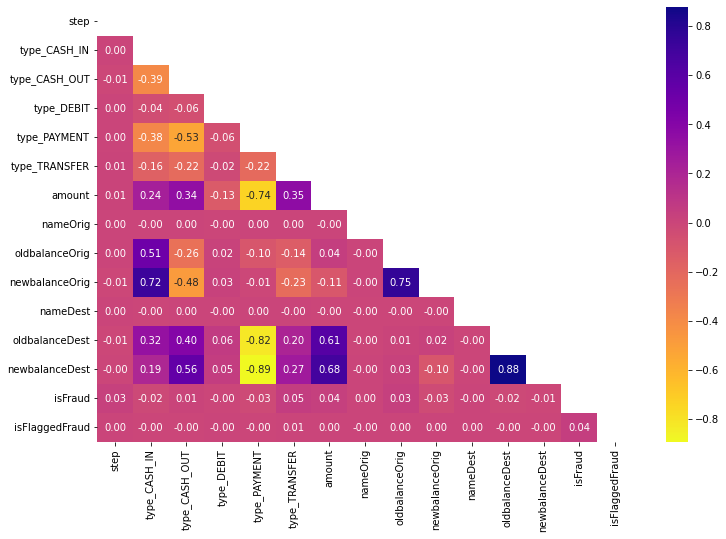

In [11]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df.corr()))
)

plt.show()

In [12]:
colsSelect = [
#    'step',
    'type_CASH_IN',
    'type_CASH_OUT',
    'type_DEBIT',
    'type_PAYMENT',
    'type_TRANSFER',
#    'amount',
#    'nameOrig',
    'oldbalanceOrig',
    'newbalanceOrig',
#    'nameDest',
    'oldbalanceDest',
    'newbalanceDest',
    'isFraud',
#    'isFlaggedFraud'
]

df = df[colsSelect]
df

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,0,0,1,0,12.044353,11.984780,0.000000,0.000000,0
1,0,0,0,1,0,9.964065,9.872240,0.000000,0.000000,0
2,0,0,0,0,1,5.198497,0.000000,0.000000,0.000000,1
3,0,1,0,0,0,5.198497,0.000000,9.960907,0.000000,1
4,0,0,0,1,0,10.634749,10.305141,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,12.735766,0.000000,0.000000,12.735766,1
6362616,0,0,0,0,1,15.657870,0.000000,0.000000,0.000000,1
6362617,0,1,0,0,0,15.657870,0.000000,11.134426,15.668663,1
6362618,0,0,0,0,1,13.652995,0.000000,0.000000,0.000000,1


In [13]:
df[df['type_PAYMENT'] == 1].describe()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,2151495.0,2151495.0,2151495.0,2151495.0,2151495.0,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0
mean,0.0,0.0,0.0,1.0,0.0,6.598166e+00,5.250012e+00,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,5.199782e+00,5.492905e+00,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,0.0,-1.714798e+00,-4.605170e+00,0.0,0.0,0.0
25%,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,9.261984e+00,0.000000e+00,0.0,0.0,0.0
75%,0.0,0.0,0.0,1.0,0.0,1.101671e+01,1.081284e+01,0.0,0.0,0.0
max,0.0,0.0,0.0,1.0,0.0,1.759255e+01,1.759226e+01,0.0,0.0,0.0
